Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./catapult_matmul.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

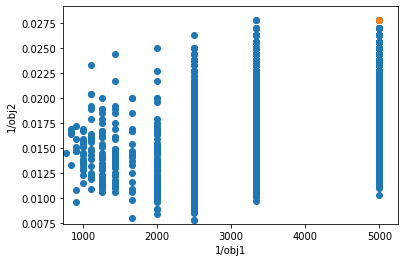

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


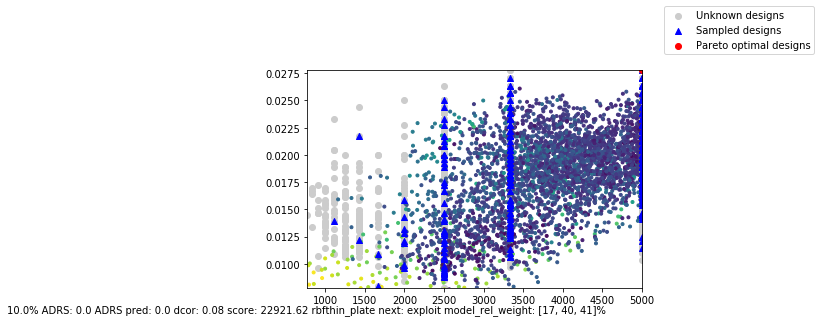

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1418, 1416, 1413, 1412, 1414,    3, 2813,    4, 2819, 2817,   11,
          1,  850,  756, 1702, 3568,    5,  204,  960,  183, 1319, 1604,
       2815, 2750,   15, 3062, 1227, 1150,    0, 2814,  139,  176,  125,
       1152,  173,  168, 2816,  357,  185,  145,  944, 2751,  170, 2497,
       2823,  142, 1353, 2800, 1395,  167,   14,  169, 2444, 2801,  570,
       2677, 1415, 2870, 2689,    2, 1193, 1650,  127, 1417, 2856,  356,
       1354, 2771, 3367, 2773,   44, 3022,   57, 3012, 1129, 1072, 3226,
       2762,  940, 1515,  378,  707, 1228, 3565,  182, 1262, 3556, 1368,
       3189,   45, 2619, 2832, 2078, 2755, 2590,  391,   43, 1396, 1437,
       2822, 2821,  961, 1505, 1206, 1139,   87, 1438,   53,   52, 1826,
        192, 1352, 2636, 1349, 3440, 2684, 1350,  161, 1345, 2697, 2465,
       1366, 1410, 2634, 1258, 2831,  141, 1364, 1343,  362, 3352, 3413,
        328,   36,  137,   59,  171,  190, 1949, 2795,   34,  947,   49,
        126,  135, 2490,   16,   13, 1377, 2026,   